In [1]:
import pandas as pd
df = pd.read_excel('../database/PreFinalDataset.xlsx')  

In [2]:
df.head(4)

,tags,headline,url,clean_body,stop_clean_body,target
0,['আমেরিকা দূর পরবাস'],নিউইয়র্কে একুশের গ্রন্থমেলা,https://www.prothomalo.com/life/durporobash/নি...,২০ ফেব্রুয়ারি বিকেল পাঁচটায় জাতিসংঘের সদর দ...,২০ ফেব্রুয়ারি বিকেল পাঁচটায় জাতিসংঘের সদর দপ...,durporobash
1,"['বিবিধ', 'বিনোদন']",abc আজকের আয়োজন,https://www.prothomalo.com/entertainment/abc-আ...,তথ্য ও বিনোদনপ্রেমরোগকথাবন্ধু শারমীন ও লাভ সি...,তথ্য বিনোদনপ্রেমরোগকথাবন্ধু শারমীন লাভ সিক বিপ...,entertainment
2,"['বিবিধ', 'বিশাল বাংলা']",বিজ্ঞানের তিনটি বিষয়ে সম্মান কোর্স চালুর দাবি,https://www.prothomalo.com/bangladesh/বিজ্ঞানে...,কক্সবাজার সরকারি কলেজে পদার্থ রসায়ন ও প্রাণিব...,কক্সবাজার সরকারি কলেজে পদার্থ রসায়ন প্রাণিবিদ্...,bangladesh
3,"['মতামত', 'চিঠিপত্র']",এমআরপি সংশোধন ফি,https://www.prothomalo.com/opinion/letter/এমআর...,বাংলাদেশে ২০০৯ সাল থেকে এমআরপি পাসপোর্ট কার্য...,বাংলাদেশে ২০০৯ সাল এমআরপি পাসপোর্ট কার্যক্রম আ...,letter


In [3]:
####### target variable anaysis ########
len(df)

10000

In [4]:
df.target.value_counts() 

bangladesh       3668
crime            1476
cricket           424
politics          371
business          343
                 ... 
victoryday          1
reaction            1
recipe              1
banglanewyear       1
poem                1
Name: target, Length: 65, dtype: int64

C:\Users\Mehedi\PycharmProjects\BanglaNewsPaperRecommendationSystem\newsVenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


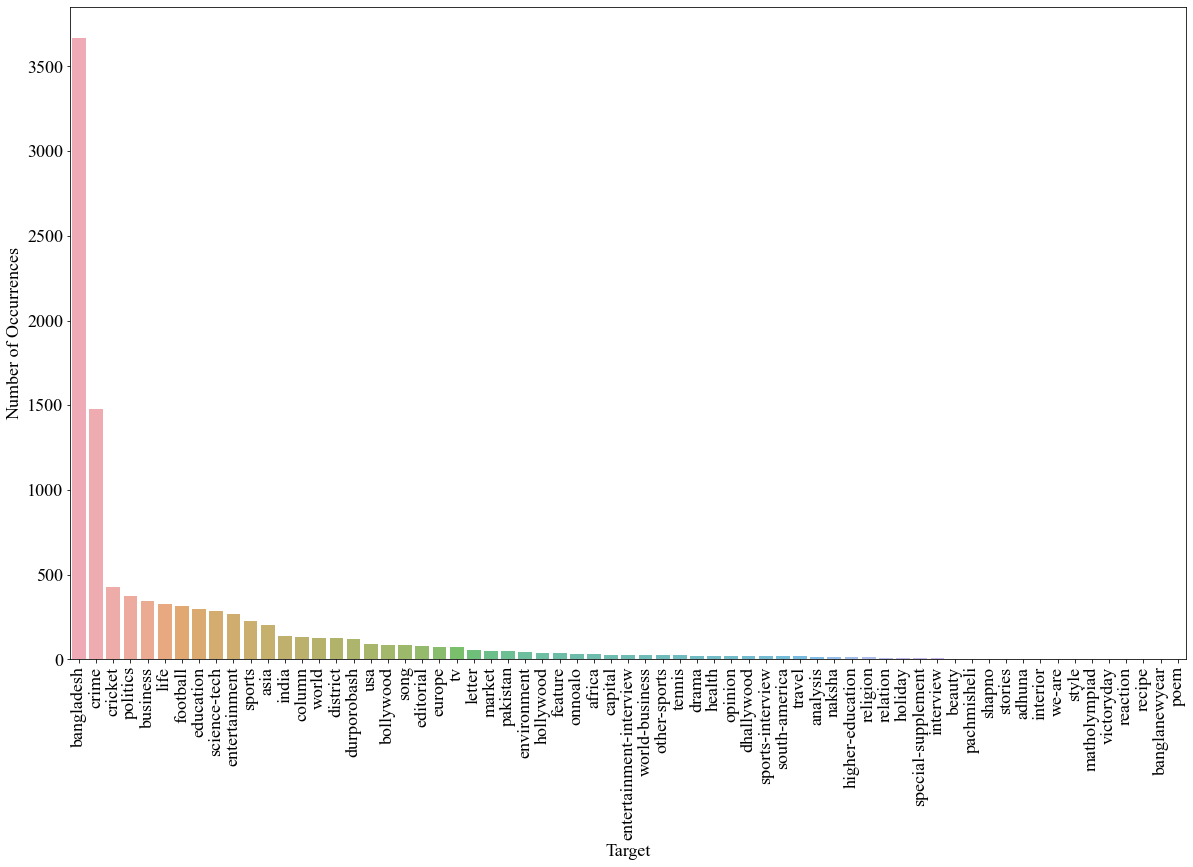

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib 
font = {'family' : 'Times New Roman',
#         'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

target_df = df.target.value_counts() 
plt.figure(figsize=(20,12))
sns.barplot(target_df.index, target_df.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('Target', fontsize=18)
plt.xticks(rotation=90)
plt.savefig('Initial All Target.jpeg')
plt.show()



In [6]:
taken_df = df.target.value_counts().rename_axis('target').reset_index(name='Frequency') 

In [7]:
taken_df 

,target,Frequency
0,bangladesh,3668
1,crime,1476
2,cricket,424
3,politics,371
4,business,343
...,...,...
60,victoryday,1
61,reaction,1
62,recipe,1
63,banglanewyear,1


In [8]:
######## find which target comes only one time ###########
taken_df = taken_df[taken_df.Frequency>100]   

In [9]:
taken_df

,target,Frequency
0,bangladesh,3668
1,crime,1476
2,cricket,424
3,politics,371
4,business,343
5,life,324
6,football,317
7,education,296
8,science-tech,286
9,entertainment,269


C:\Users\Mehedi\PycharmProjects\BanglaNewsPaperRecommendationSystem\newsVenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


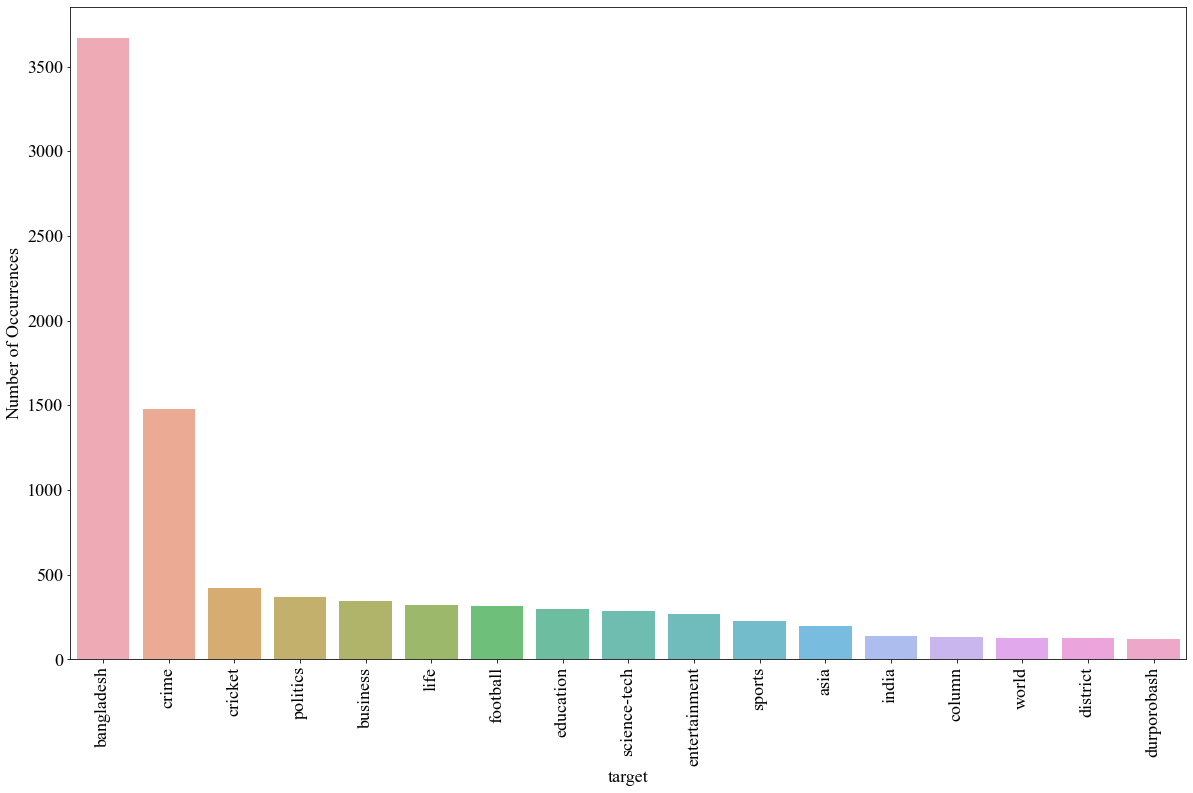

In [10]:
plt.figure(figsize=(20,12))
sns.barplot(taken_df.target.tolist(), taken_df.Frequency.tolist(), alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('target', fontsize=18)
plt.xticks(rotation=90)
plt.savefig('Taken target though imbalanced.jpeg')
plt.show()

In [11]:
from statistics import mean
avg_num_target = mean(taken_df.Frequency.tolist())
print(avg_num_target)
print(len(df[df.target == 'durporobash']))


520.0588235294117
119


In [12]:
### merge with final ##
df2 = df.merge(taken_df, on='target') 
df2

,tags,headline,url,clean_body,stop_clean_body,target,Frequency
0,['আমেরিকা দূর পরবাস'],নিউইয়র্কে একুশের গ্রন্থমেলা,https://www.prothomalo.com/life/durporobash/নি...,২০ ফেব্রুয়ারি বিকেল পাঁচটায় জাতিসংঘের সদর দ...,২০ ফেব্রুয়ারি বিকেল পাঁচটায় জাতিসংঘের সদর দপ...,durporobash,119
1,"['দূর পরবাস', 'ইউরোপ দূর পরবাস']",বার্সেলোনায় বাংলা স্কুলের ক্রীড়া প্রতিযোগিতা,https://www.prothomalo.com/life/durporobash/বা...,বার্সেলোনায় বাংলা স্কুলের সমাপনী পরীক্ষার ফল...,বার্সেলোনায় বাংলা স্কুলের সমাপনী পরীক্ষার ফল ...,durporobash,119
2,['দূর পরবাস - মধ্যপ্রাচ্য'],আবুধাবিতে রবীন্দ্র-নজরুল জয়ন্তী,https://www.prothomalo.com/life/durporobash/আব...,সংযুক্ত আরব আমিরাতের রাজধানী আবুধাবিতে বাংলাদ...,সংযুক্ত আরব আমিরাতের রাজধানী আবুধাবিতে বাংলাদে...,durporobash,119
3,['জাপান দূর পরবাস'],"বাংলাদেশ যখন অন্ধকারে, জাপান তখন...",https://www.prothomalo.com/life/durporobash/বা...,তীব্র শীত আজ ১ ফেব্রুয়ারি টোকিওর তাপমাত্রা ৯...,তীব্র শীত ১ ফেব্রুয়ারি টোকিওর তাপমাত্রা ৯ ডিগ...,durporobash,119
4,"['দূর পরবাস - সংগঠনিক - সংবাদ', 'দূর পরবাস', '...",ইয়ুথ ফেস্টে প্রবাসী বাংলাদেশিদের অংশগ্রহণ,https://www.prothomalo.com/life/durporobash/ইয...,ক্যালিফোর্নিয়া অঙ্গরাজ্যে প্রবাসী বাংলাদেশিদ...,ক্যালিফোর্নিয়া অঙ্গরাজ্যে প্রবাসী বাংলাদেশিদে...,durporobash,119
...,...,...,...,...,...,...,...
8836,"['ভারত', 'বিদেশ']",ভারতের জলমানবের 'নোবেল' জয়,https://www.prothomalo.com/world/india/ভারতের-...,খরাকে পরাস্ত করা বন্যা প্রতিরোধ মাটির উর্বরতা...,খরাকে পরাস্ত বন্যা প্রতিরোধ মাটির উর্বরতা ফিরি...,india,137
8837,['ভারত'],হরিয়ানা-মহারাষ্ট্রে দলকে জেতাতে মাঠে মোদি,https://www.prothomalo.com/world/india/হরিয়ান...,হরিয়ানা ও মহারাষ্ট্র বিধানসভার নির্বাচনে বিজ...,হরিয়ানা মহারাষ্ট্র বিধানসভার নির্বাচনে বিজেপি...,india,137
8838,['ভারত'],তৃণমূল 'গুন্ডাদের' হাত কেটে নেওয়ার হুমকি বিজেপির,https://www.prothomalo.com/world/india/তৃণমূল-...,ভারতের তৃণমূল গুন্ডাদের হাত কেটে দেওয়ার হুমক...,ভারতের তৃণমূল গুন্ডাদের হাত কেটে হুমকি বীরভূমে...,india,137
8839,['ভারত'],মমতার ভাইপোর গালে দলীয় কর্মীর সপাটে চড়,https://www.prothomalo.com/world/india/মমতার-ভ...,তৃণমূলের যুব কংগ্রেসের সম্মেলনে প্রকাশ্য সমাব...,তৃণমূলের যুব কংগ্রেসের সম্মেলনে প্রকাশ্য সমাবে...,india,137


In [13]:
del df2['Frequency']

In [14]:
df2.target.value_counts() 

bangladesh       3668
crime            1476
cricket           424
politics          371
business          343
life              324
football          317
education         296
science-tech      286
entertainment     269
sports            229
asia              200
india             137
column            131
world             126
district          125
durporobash       119
Name: target, dtype: int64

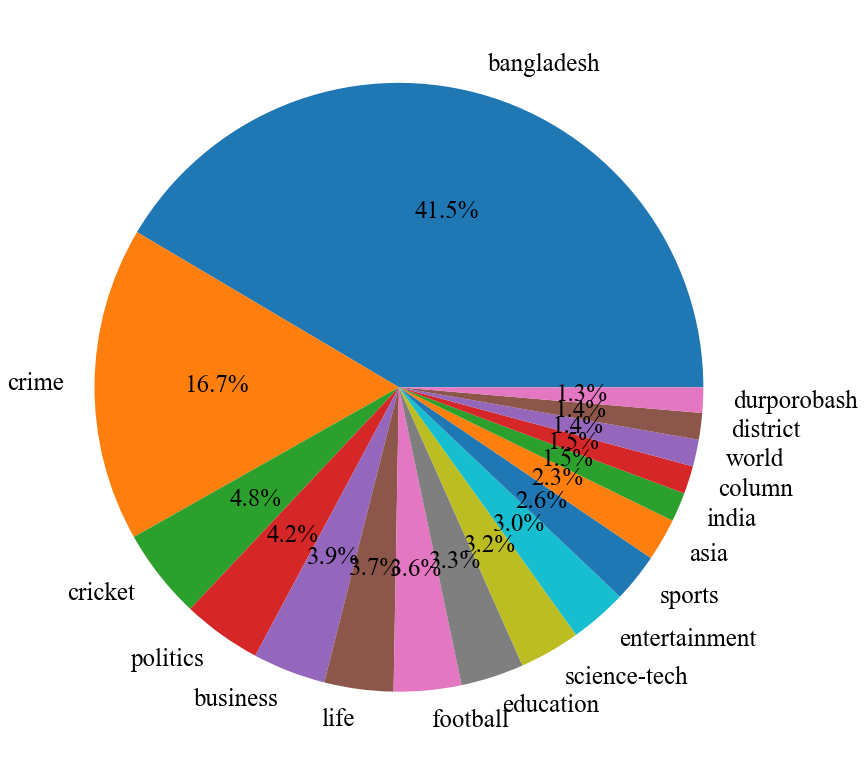

In [15]:
from matplotlib.gridspec import GridSpec
import numpy as np
font = {'family' : 'Times New Roman',
#         'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

targetCounts = df2['target'].value_counts()
targetLabels  = df2['target'].value_counts().rename_axis('Target').reset_index(name='Frequency')
targetLabels = targetLabels.Target.tolist()
# Make square figures and axes
cmap = plt.get_cmap('coolwarm')
plt.figure(1, figsize=(18,14))
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=False)
plt.savefig('imbalancedbalancedpie.jpeg')
plt.show()

In [16]:
for i in taken_df.target: 
    ind = df2.target[df2.target == i].index
    d2f = df2.drop(ind[300:])

In [17]:
keep_data = int(avg_num_target)
for i in taken_df.target:  # title df2 is used for reduce time complexity  ### Down sampling ###
    if len(df2[df2.target == i])>keep_data:
        indexNames = df2[df2.target== i ].index
        keep_16 = indexNames[keep_data:]
        df2 = df2.drop(keep_16)
    else:
        pass

In [18]:
master_copy_df = pd.DataFrame()
for i in taken_df.target:  # title df2 is used for reduce time complexity  ### Down sampling ###
    if len(df2[df2.target == i] )<keep_data:     ### up sampling ##
        clone_df = pd.DataFrame()
        indexNames = df2[ df2.target == i ].index
        multi_factor = round(keep_data/len(indexNames)) # already exist same amount of len(indexNames)
        for j in indexNames:
            clone_df = clone_df.append(df2.loc[[j]*multi_factor],ignore_index = True)
        approved_index = keep_data-len(indexNames)
        clone_df = clone_df.iloc[:approved_index]
        frames = [master_copy_df, clone_df]
        master_copy_df = pd.concat(frames)
    else:
        pass

In [19]:
final_frame = [df2, master_copy_df]
final_df = pd.concat(final_frame)

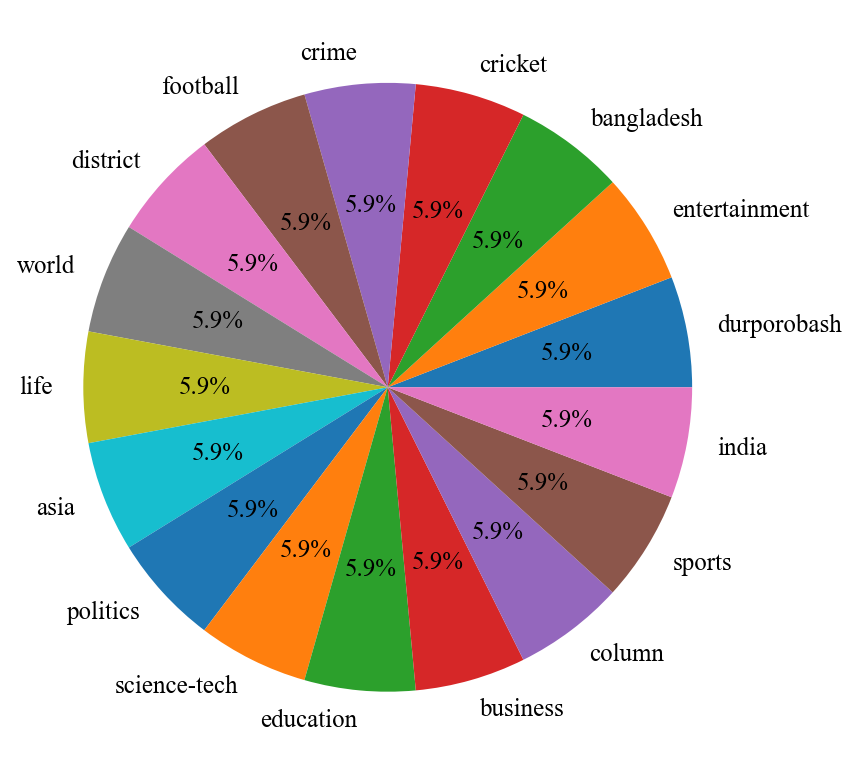

In [20]:
from matplotlib.gridspec import GridSpec
import numpy as np
font = {'family' : 'Times New Roman',
#         'weight' : 'bold',
        'size'   : 25} 

matplotlib.rc('font', **font) 

targetCounts = final_df['target'].value_counts()
targetLabels  = final_df['target'].unique()
# Make square figures and axes
plt.figure(1, figsize=(18,14))
cmap = plt.get_cmap('coolwarm')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=False, )
plt.savefig('balancedpie.jpeg')
plt.show()

In [21]:
############### maximum word counter analysis ###############


In [22]:
final_df = final_df.sample(frac = 1)
# final_df.to_excel('../dataset/FinalTrainAbleDataset.xlsx')